## Core Measurements Plotting 

The _CAP-01_kernmetingen.csv_ file contains the actual petrophysical measurements taken on those cores, are available at [NLOG data center](https://www.nlog.nl/datacenter/brh-overview), under tab _kernmetingen_. We have created _CAP-01_kernmetingen.cvs_ file. 

In [3]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

#Use this for static figures
%matplotlib inline   
# Use this for interactive figures (zoom in/out, save, etc.)
#%matplotlib widget  

In [4]:
# functions to prepare data before processing and visualizing

# This function converts absent values to NaN
# E.g. null = -999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-999.25):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))


Loading the file using pandas and displaying the first five lines, we can see that there are three properties measured: Porosity, Permeability, and Density.

In [5]:
# Reading the .csv file containinig experimental petrophysical measurements 
km = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')

In [6]:
km.head()

,nummer,deipte (m),Porositeit (%),hor. Perm (mD),Korreldichtheid (g/cm³)
0,K-0001,3112.05,13.2,10,2.65
1,K-0001C,3112.05,13.2,10,-
2,K-0002,3112.35,12.5,7.7,2.65
3,K-0002N,3112.35,12.6,10,2.65
4,K-0003,3112.65,14.0,29,2.65


### Converting Objects into Data Arrays  
As explained in the past notebook, we need to convert strings (object) into arrays (float) to be able to plot the values correctly.

In [7]:
# Converting '-' into Nan and removing outliers
km2= valtonan(km, val='-')
km2= valtonan(km, val='0.66')
den2=km2['Korreldichtheid (g/cm³)']
dd2 = np.array(den2.values, dtype=float)
np.nanmin(dd2), np.nanmax(dd2)

(2.64, 2.98)

In [8]:
por2=km2['Porositeit (%)']
p2 = np.array(por2.values, dtype=float)
np.nanmin(p2), np.nanmax(p2)

(0.7, 18.1)

In [9]:
perm2=km2['hor. Perm (mD)']
p3 = np.array(perm2.values, dtype=float)
np.nanmin(p3), np.nanmax(p3)

(0.01, 89.0)

## Plotting Petrophysical Measurements

Let's plot separately each property to be able to inspect them in the appropriate range. Clearly, each core interval shows the the corresponding measurements.

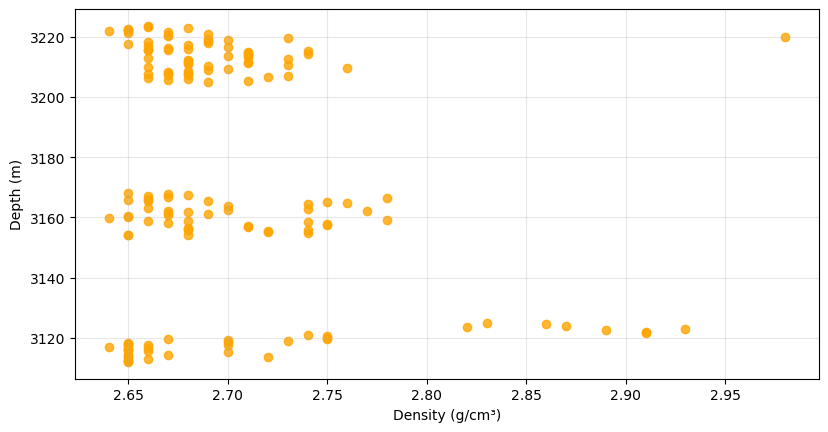

In [10]:
f1 = plt.figure(figsize=plt.figaspect(0.5))
plt.scatter(dd2,km['deipte (m)'],alpha=0.8,c="orange")
plt.xlabel('Density (g/cm³)')
plt.ylabel('Depth (m)')
plt.grid(True, alpha=0.3)

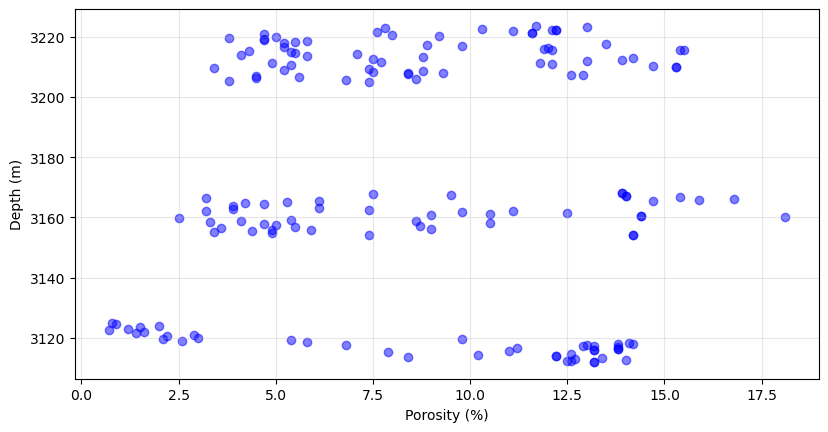

In [11]:
f2 = plt.figure(figsize=plt.figaspect(0.5))
plt.scatter(p2,km['deipte (m)'],alpha=0.5, c='b')
plt.xlabel('Porosity (%)')
plt.ylabel('Depth (m)')
plt.grid(True, alpha=0.3)

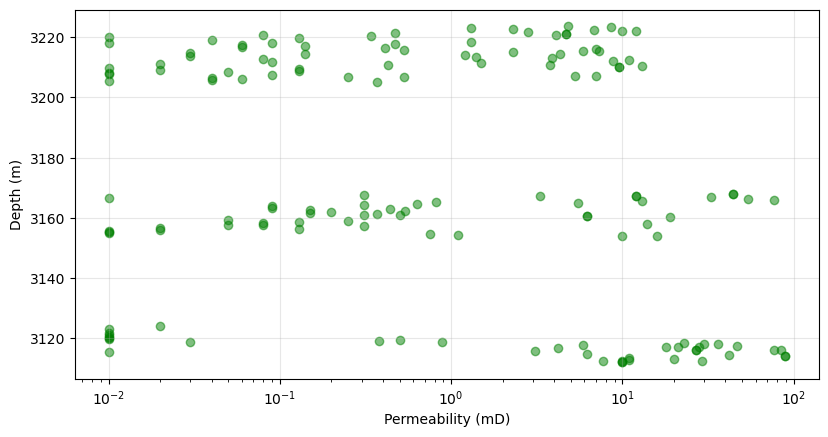

In [12]:
f3 = plt.figure(figsize=plt.figaspect(0.5))
plt.scatter(p3,km['deipte (m)'],alpha=0.5, c='g')
plt.xlabel('Permeability (mD)')
plt.xscale("log")
plt.ylabel('Depth (m)')
plt.grid(True, alpha=0.3)

## Property Crossploting 

Next, we can make crossplots to identify trends and reletionships between the petrophysical proerties and depth. For instance, we plot Density as a function of Porosity, while indicating the depth of each core sample by the colorbar. followed by a crossplot of Density as a function of Permeability. 

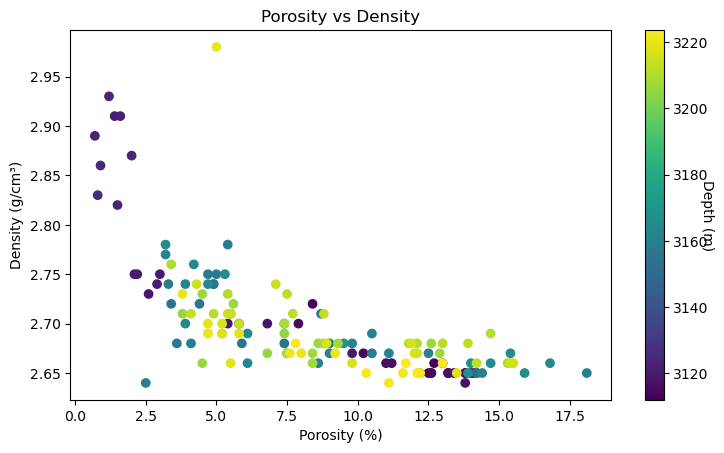

In [13]:
#Plotting the depth intervals with cores

f4 = plt.figure(figsize=plt.figaspect(0.55))
plt.scatter(p2,dd2,c=km['deipte (m)'])
plt.title("Porosity vs Density")
plt.xlabel("Porosity (%)")
plt.ylabel("Density (g/cm³)")
cbar = plt.colorbar()
cbar.set_label('Depth (m)',rotation=270, va ='top')

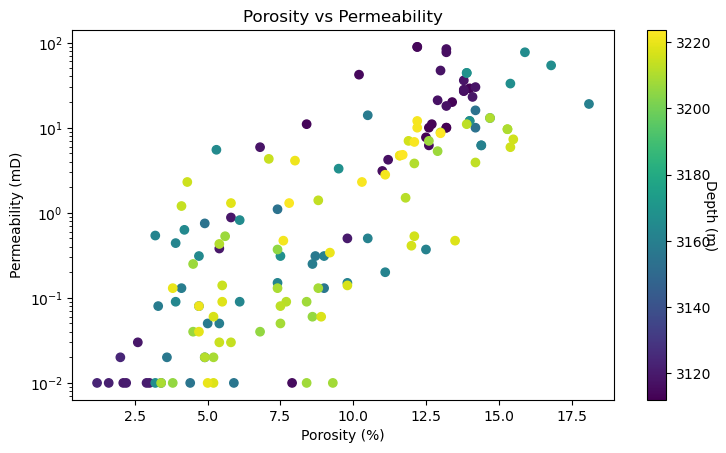

In [14]:

f5 = plt.figure(figsize=plt.figaspect(0.55))
plt.scatter(p2,p3,c=km['deipte (m)'])
plt.title("Porosity vs Permeability")
plt.xlabel("Porosity (%)")
plt.ylabel("Permeability (mD)")
plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label('Depth (m)',rotation=270)

## End of the Excercise

This concludes this excercise, which focused on loading, checking, and plotting well logs and petrophysical measurements using Python libraries. This simple scripts can be adapted to check other files, improved and optimized using other Python libraries and defining functions for repetitive tasks.

Next steps would include data processing to compute geomechanical properties, for example. But these are for another series of Jupyter Notebooks.